In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [61]:
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """
    # randomly select initial clusters from input data
    np.random.seed(1234)
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False
    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
        
        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)
        
        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)
                
        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()
        
    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)
    clustersWithNoPoints = []
    
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])
            
    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
        
    return clusters, stds

In [82]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True, seed = 1234):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
        
        self.seed = seed
        np.random.seed(self.seed)
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
        
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
            
        # training
        loss_list = []
        for epoch in range(self.epochs):
            loss_list2 = []
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2
                print('Loss: {0:.2f}'.format(loss[0]))
                
                # backward pass
                error = -(y[i] - F).flatten()
                loss_list2.append(loss[0])
                
                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
                
            loss_list.append(sum(loss_list2)/len(loss_list2))
        return loss_list

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

In [83]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [84]:
NUM_SAMPLES = 100
np.random.seed(1234)
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X)  + noise


rbfnet_ver1 = RBFNet(lr=1e-3, k=2)
loss_list = rbfnet_ver1.fit(X, y)
y_pred = rbfnet_ver1.predict(X)

Loss: 2.15
Loss: 2.17
Loss: 2.01
Loss: 1.75
Loss: 1.49
Loss: 1.84
Loss: 1.86
Loss: 1.53
Loss: 1.61
Loss: 0.97
Loss: 1.20
Loss: 1.21
Loss: 1.06
Loss: 0.79
Loss: 0.78
Loss: 1.00
Loss: 0.86
Loss: 0.90
Loss: 0.64
Loss: 0.68
Loss: 0.66
Loss: 0.63
Loss: 0.67
Loss: 0.74
Loss: 0.88
Loss: 0.97
Loss: 0.94
Loss: 0.92
Loss: 1.18
Loss: 1.20
Loss: 1.09
Loss: 1.03
Loss: 0.99
Loss: 1.33
Loss: 1.49
Loss: 1.51
Loss: 1.12
Loss: 1.49
Loss: 1.44
Loss: 1.36
Loss: 1.74
Loss: 1.32
Loss: 1.29
Loss: 1.57
Loss: 1.82
Loss: 1.68
Loss: 1.48
Loss: 1.85
Loss: 1.63
Loss: 1.78
Loss: 1.42
Loss: 1.58
Loss: 1.79
Loss: 1.87
Loss: 1.52
Loss: 1.51
Loss: 1.50
Loss: 1.41
Loss: 1.50
Loss: 1.53
Loss: 1.70
Loss: 1.44
Loss: 1.31
Loss: 1.33
Loss: 1.27
Loss: 1.33
Loss: 1.41
Loss: 1.40
Loss: 1.19
Loss: 1.13
Loss: 1.27
Loss: 1.37
Loss: 1.38
Loss: 1.13
Loss: 1.43
Loss: 1.19
Loss: 1.41
Loss: 1.23
Loss: 1.25
Loss: 1.29
Loss: 1.33
Loss: 1.39
Loss: 1.26
Loss: 1.31
Loss: 1.50
Loss: 1.76
Loss: 1.71
Loss: 1.54
Loss: 1.67
Loss: 1.75
Loss: 1.60

Loss: 0.38
Loss: 0.31
Loss: 0.20
Loss: 0.12
Loss: 0.22
Loss: 0.23
Loss: 0.12
Loss: 0.14
Loss: 0.00
Loss: 0.03
Loss: 0.03
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.04
Loss: 0.03
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.05
Loss: 0.09
Loss: 0.10
Loss: 0.02
Loss: 0.09
Loss: 0.08
Loss: 0.07
Loss: 0.17
Loss: 0.06
Loss: 0.06
Loss: 0.12
Loss: 0.20
Loss: 0.15
Loss: 0.10
Loss: 0.20
Loss: 0.13
Loss: 0.18
Loss: 0.08
Loss: 0.11
Loss: 0.17
Loss: 0.19
Loss: 0.09
Loss: 0.09
Loss: 0.08
Loss: 0.05
Loss: 0.07
Loss: 0.07
Loss: 0.11
Loss: 0.05
Loss: 0.03
Loss: 0.03
Loss: 0.02
Loss: 0.03
Loss: 0.04
Loss: 0.03
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.03
Loss: 0.00
Loss: 0.03
Loss: 0.01
Loss: 0.03
Loss: 0.01
Loss: 0.02
Loss: 0.02
Loss: 0.03
Loss: 0.04
Loss: 0.02
Loss: 0.03
Loss: 0.08
Loss: 0.15
Loss: 0.17
Loss: 0.13
Loss: 0.18
Loss: 0.22
Loss: 0.18
Loss: 0.28

Loss: 0.00
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.06
Loss: 0.01
Loss: 0.00
Loss: 0.03
Loss: 0.07
Loss: 0.05
Loss: 0.02
Loss: 0.07
Loss: 0.03
Loss: 0.06
Loss: 0.01
Loss: 0.02
Loss: 0.05
Loss: 0.06
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.03
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.03
Loss: 0.00
Loss: 0.02
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.04
Loss: 0.05
Loss: 0.03
Loss: 0.06
Loss: 0.09
Loss: 0.06
Loss: 0.12
Loss: 0.12
Loss: 0.06
Loss: 0.13
Loss: 0.09
Loss: 0.06
Loss: 0.12
Loss: 0.03
Loss: 0.02
Loss: 0.19
Loss: 0.20
Loss: 0.15
Loss: 0.07
Loss: 0.03
Loss: 0.09
Loss: 0.09
Loss: 0.03
Loss: 0.04
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.05
Loss: 0.06
Loss: 0.02
Loss: 0.05
Loss: 0.04
Loss: 0.12
Loss: 0.11
Loss: 0.12
Loss: 0.14
Loss: 0.12
Loss: 0.09
Loss: 0.05
Loss: 0.03
Loss: 0.03

Loss: 0.01
Loss: 0.01
Loss: 0.05
Loss: 0.01
Loss: 0.03
Loss: 0.00
Loss: 0.02
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.02
Loss: 0.03
Loss: 0.02
Loss: 0.04
Loss: 0.06
Loss: 0.04
Loss: 0.10
Loss: 0.09
Loss: 0.04
Loss: 0.10
Loss: 0.07
Loss: 0.05
Loss: 0.10
Loss: 0.02
Loss: 0.01
Loss: 0.17
Loss: 0.17
Loss: 0.13
Loss: 0.06
Loss: 0.02
Loss: 0.08
Loss: 0.08
Loss: 0.02
Loss: 0.03
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.06
Loss: 0.07
Loss: 0.02
Loss: 0.05
Loss: 0.04
Loss: 0.13
Loss: 0.12
Loss: 0.12
Loss: 0.14
Loss: 0.12
Loss: 0.09
Loss: 0.05
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.02
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.05
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.06
Loss: 0.03
Loss: 0.01
Loss: 0.05
Loss: 0.02
Loss: 0.04
Loss: 0.00
Loss: 0.01
Loss: 0.03
Loss: 0.04
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00

Loss: 0.05
Loss: 0.03
Loss: 0.02
Loss: 0.01
Loss: 0.05
Loss: 0.01
Loss: 0.04
Loss: 0.01
Loss: 0.02
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.02
Loss: 0.03
Loss: 0.01
Loss: 0.03
Loss: 0.06
Loss: 0.04
Loss: 0.09
Loss: 0.08
Loss: 0.03
Loss: 0.09
Loss: 0.06
Loss: 0.04
Loss: 0.09
Loss: 0.02
Loss: 0.01
Loss: 0.16
Loss: 0.17
Loss: 0.12
Loss: 0.06
Loss: 0.02
Loss: 0.07
Loss: 0.08
Loss: 0.02
Loss: 0.03
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.06
Loss: 0.06
Loss: 0.02
Loss: 0.05
Loss: 0.04
Loss: 0.12
Loss: 0.11
Loss: 0.11
Loss: 0.13
Loss: 0.11
Loss: 0.09
Loss: 0.05
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.04
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.05
Loss: 0.03
Loss: 0.01
Loss: 0.05
Loss: 0.02
Loss: 0.04
Loss: 0.00
Loss: 0.01
Loss: 0.03
Loss: 0.04
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00

Loss: 0.05
Loss: 0.03
Loss: 0.08
Loss: 0.08
Loss: 0.03
Loss: 0.09
Loss: 0.06
Loss: 0.04
Loss: 0.08
Loss: 0.01
Loss: 0.00
Loss: 0.15
Loss: 0.16
Loss: 0.12
Loss: 0.06
Loss: 0.02
Loss: 0.07
Loss: 0.08
Loss: 0.02
Loss: 0.03
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.05
Loss: 0.06
Loss: 0.02
Loss: 0.04
Loss: 0.03
Loss: 0.11
Loss: 0.10
Loss: 0.11
Loss: 0.12
Loss: 0.10
Loss: 0.08
Loss: 0.04
Loss: 0.02
Loss: 0.03
Loss: 0.03
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.04
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.05
Loss: 0.03
Loss: 0.01
Loss: 0.05
Loss: 0.02
Loss: 0.04
Loss: 0.00
Loss: 0.01
Loss: 0.03
Loss: 0.04
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.04
Loss: 0.05
Loss: 0.03
Loss: 0.02
Loss: 0.01
Loss: 0.06
Loss: 0.01
Loss: 0.04
Loss: 0.01
Loss: 0.03
Loss: 0.02
Loss: 0.02

Loss: 0.01
Loss: 0.04
Loss: 0.03
Loss: 0.10
Loss: 0.09
Loss: 0.10
Loss: 0.11
Loss: 0.10
Loss: 0.07
Loss: 0.03
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.05
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.05
Loss: 0.03
Loss: 0.01
Loss: 0.05
Loss: 0.02
Loss: 0.04
Loss: 0.00
Loss: 0.01
Loss: 0.03
Loss: 0.04
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.04
Loss: 0.05
Loss: 0.03
Loss: 0.02
Loss: 0.02
Loss: 0.06
Loss: 0.01
Loss: 0.04
Loss: 0.01
Loss: 0.03
Loss: 0.02
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.02
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.01
Loss: 0.03
Loss: 0.05
Loss: 0.03
Loss: 0.08
Loss: 0.07
Loss: 0.03
Loss: 0.08
Loss: 0.05
Loss: 0.03
Loss: 0.08
Loss: 0.01
Loss: 0.00
Loss: 0.15
Loss: 0.16
Loss: 0.12
Loss: 0.06
Loss: 0.02
Loss: 0.07

Loss: 0.03
Loss: 0.02
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.02
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.01
Loss: 0.02
Loss: 0.04
Loss: 0.03
Loss: 0.07
Loss: 0.07
Loss: 0.02
Loss: 0.08
Loss: 0.05
Loss: 0.03
Loss: 0.07
Loss: 0.01
Loss: 0.00
Loss: 0.14
Loss: 0.15
Loss: 0.11
Loss: 0.05
Loss: 0.02
Loss: 0.07
Loss: 0.07
Loss: 0.02
Loss: 0.03
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.05
Loss: 0.05
Loss: 0.01
Loss: 0.04
Loss: 0.03
Loss: 0.10
Loss: 0.09
Loss: 0.09
Loss: 0.11
Loss: 0.09
Loss: 0.06
Loss: 0.03
Loss: 0.01
Loss: 0.02
Loss: 0.02
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.00
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.05
Loss: 0.00
Loss: 0.00
Loss: 0.02
Loss: 0.05
Loss: 0.03
Loss: 0.01
Loss: 0.05
Loss: 0.02
Loss: 0.03
Loss: 0.00
Loss: 0.01
Loss: 0.03
Loss: 0.04
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01

In [85]:
loss_list

[1.3727505262688495,
 1.0750019364126484,
 0.8438040820883529,
 0.6642751215130942,
 0.5248603345463724,
 0.41658841733784674,
 0.3324939958574872,
 0.26716921104141766,
 0.2164155297209797,
 0.17697338183798764,
 0.14631223023260728,
 0.12246756643322004,
 0.10391434435684849,
 0.08946870776073076,
 0.07821168740915274,
 0.06942995728897752,
 0.06256983671928194,
 0.057201577439816714,
 0.05299163654109504,
 0.04968114997876209,
 0.04706922044803918,
 0.044999943246064565,
 0.04335233435098499,
 0.04203251177299175,
 0.0409676263019629,
 0.040101150421075725,
 0.03938922162234102,
 0.038797804275638066,
 0.038300486937114714,
 0.03787677292883507,
 0.03751075381408449,
 0.037190080077713523,
 0.03690516248699784,
 0.0366485524893374,
 0.03641446155661189,
 0.036198388355967594,
 0.03599682959078847,
 0.03580705576206845,
 0.03562693729757722,
 0.03545480975448315,
 0.03528936933040646,
 0.03512959188123526,
 0.03497467016802034,
 0.034823965238131666,
 0.034676968763927445,
 0.0345332

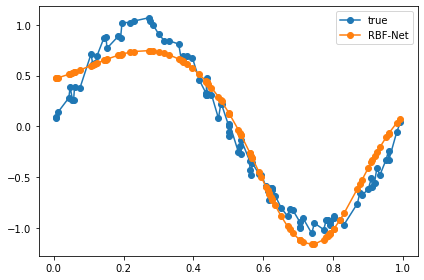

In [86]:
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

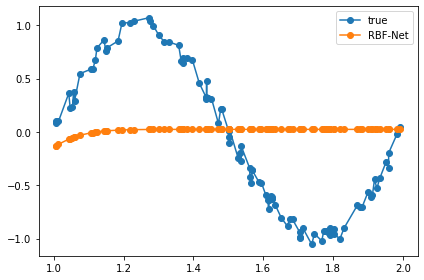

In [39]:
X_test = np.random.uniform(1., 2., NUM_SAMPLES)
X_test = np.sort(X_test,axis = 0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y_test = y = np.sin(2 * np.pi * X_test)  + noise

y_test_pred = rbfnet_ver1.predict(X_test)
plt.plot(X_test, y_test, '-o', label='true')
plt.plot(X_test, y_test_pred, '-o', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

# 코드 수정

In [75]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True, seed = 1234):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
        self.seed = seed
        
        np.random.seed(self.seed)
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
        
    def cluster(self, X):
        # randomly select initial clusters from input data
        clusters = np.random.choice(np.squeeze(X), size=self.k)
        prevClusters = clusters.copy()
        stds = np.zeros(self.k)
        converged = False
        while not converged:
            """
            compute distances for each cluster center to each point 
            where (distances[i, j] represents the distance between the ith point and jth cluster)
            """
            distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

            # find the cluster that's closest to each point
            closestCluster = np.argmin(distances, axis=1)

            # update clusters by taking the mean of all of the points assigned to that cluster
            for i in range(self.k):
                pointsForCluster = X[closestCluster == i]
                if len(pointsForCluster) > 0:
                    clusters[i] = np.mean(pointsForCluster, axis=0)

            # converge if clusters haven't moved
            converged = np.linalg.norm(clusters - prevClusters) < 1e-6
            prevClusters = clusters.copy()

        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
        closestCluster = np.argmin(distances, axis=1)
        clustersWithNoPoints = []

        for i in range(self.k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) < 2:
                # keep track of clusters with no points or 1 point
                clustersWithNoPoints.append(i)
                continue
            else:
                stds[i] = np.std(X[closestCluster == i])

        # if there are clusters with 0 or 1 points, take the mean std of the other clusters
        if len(clustersWithNoPoints) > 0:
            pointsToAverage = []
            for i in range(self.k):
                if i not in clustersWithNoPoints:
                    pointsToAverage.append(X[closestCluster == i])
            pointsToAverage = np.concatenate(pointsToAverage).ravel()
            stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
        
        return clusters, stds
        
        
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = self.cluster(X)
            
        else:
            # use a fixed std 
            self.centers, _ = self.cluster(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
        # training
        loss_list = []
        for epoch in range(self.epochs):
            loss_list2 = []
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2
                loss_list2.append(loss[0])
                
                # backward pass
                error = -(y[i] - F).flatten()
                
                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error

                
            loss_mean = sum(loss_list2) / len(loss_list2)
            loss_list.append(loss_mean)
            loss_std = np.std(loss_list2)
            
            self.centers = (self.centers + self.lr * loss_mean) 
            self.stds = (self.stds + self.lr * loss_mean)
            
            if epoch >= 5 and (loss_list[epoch] > min(loss_list[epoch-5:epoch-1])) :
                return loss_list
        
        return loss_list
    
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

In [79]:
# fit
rbfnet = RBFNet(lr=1e-3, k=2,epochs = 1000)
loss_list = rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)

In [80]:
loss_list

[1.2176909244509728,
 0.9518616273294407,
 0.7458710350484228,
 0.5864247877500994,
 0.46310129871340294,
 0.36776622627482636,
 0.2940909051389916,
 0.23716321216192113,
 0.19317711731761159,
 0.1591873081986269,
 0.1329165677659208,
 0.11260531794365235,
 0.09689452653969743,
 0.0847348197063731,
 0.07531606865205476,
 0.06801291136529258,
 0.06234264222562483,
 0.057932682015470006,
 0.054495458866331316,
 0.05180901653318032,
 0.04970204610204908,
 0.048042332738390606,
 0.0467278383641695,
 0.04567981867620007,
 0.04483751017063919,
 0.044154028851590546,
 0.043593204134775555,
 0.04312713460195538,
 0.042734300976889135,
 0.04239810927416473,
 0.04210576606390263,
 0.04184741016287619,
 0.041615442321506844,
 0.041404007795051705,
 0.04120859696701767,
 0.04102573712800495,
 0.04085275463933541,
 0.04068759144093655,
 0.040528663515546876,
 0.04037475174209612,
 0.040224917749681365,
 0.040078439066216436,
 0.03993475915551139,
 0.03979344894043012,
 0.03965417718519107,
 0.03951

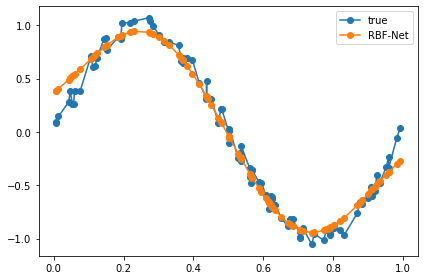

In [81]:
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
X_test = np.random.uniform(1., 2., NUM_SAMPLES)
X_test = np.sort(X_test,axis = 0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y_test = y = np.sin(2 * np.pi * X_test)  + noise

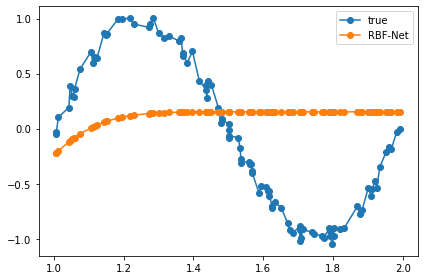

In [56]:
y_test_pred = rbfnet.predict(X_test)
plt.plot(X_test, y_test, '-o', label='true')
plt.plot(X_test, y_test_pred, '-o', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

# 코드 수정2

In [17]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True, seed = 1234):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
        self.seed = seed
        
        np.random.seed(self.seed)
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
        
    def cluster(self, X):
        # randomly select initial clusters from input data
        clusters = np.random.choice(np.squeeze(X), size=self.k)
        prevClusters = clusters.copy()
        stds = np.zeros(self.k)
        converged = False
        while not converged:
            """
            compute distances for each cluster center to each point 
            where (distances[i, j] represents the distance between the ith point and jth cluster)
            """
            distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

            # find the cluster that's closest to each point
            closestCluster = np.argmin(distances, axis=1)

            # update clusters by taking the mean of all of the points assigned to that cluster
            for i in range(self.k):
                pointsForCluster = X[closestCluster == i]
                if len(pointsForCluster) > 0:
                    clusters[i] = np.mean(pointsForCluster, axis=0)

            # converge if clusters haven't moved
            converged = np.linalg.norm(clusters - prevClusters) < 1e-6
            prevClusters = clusters.copy()

        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
        closestCluster = np.argmin(distances, axis=1)
        clustersWithNoPoints = []

        for i in range(self.k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) < 2:
                # keep track of clusters with no points or 1 point
                clustersWithNoPoints.append(i)
                continue
            else:
                stds[i] = np.std(X[closestCluster == i])

        # if there are clusters with 0 or 1 points, take the mean std of the other clusters
        if len(clustersWithNoPoints) > 0:
            pointsToAverage = []
            for i in range(self.k):
                if i not in clustersWithNoPoints:
                    pointsToAverage.append(X[closestCluster == i])
            pointsToAverage = np.concatenate(pointsToAverage).ravel()
            stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
        
        return clusters, stds
        
        
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = self.cluster(X)
            
        else:
            # use a fixed std 
            self.centers, _ = self.cluster(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
        # training
        loss_list = []
        for epoch in range(self.epochs):
            loss_list2 = []
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2
                loss_list2.append(loss[0])
                
                # backward pass
                error = -(y[i] - F).flatten()
                
                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
                
            loss_mean = sum(loss_list2) / len(loss_list2)
            print('Loss: {0:.2f}'.format(loss_mean))
            loss_list.append(loss_mean)
            
            self.centers = (self.lr * self.centers + loss_mean) 
            self.stds = (self.lr * self.stds + loss_mean)
            
            if epoch >= 5 and (loss_list[epoch] > min(loss_list[epoch-5:epoch-1])) :
                return loss_list
        
        return loss_list
    
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

In [18]:
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X)  + noise

# fit
rbfnet = RBFNet(lr=1e-2, k=2,epochs = 1000)
loss_list = rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)

Loss: 0.58
Loss: 0.36
Loss: 0.62
Loss: 0.41
Loss: 0.51
Loss: 0.45


In [19]:
loss_list

[0.5762390492382855,
 0.3619542709674326,
 0.6212828302584207,
 0.4141646398235839,
 0.5076127354575091,
 0.44671446623202404]

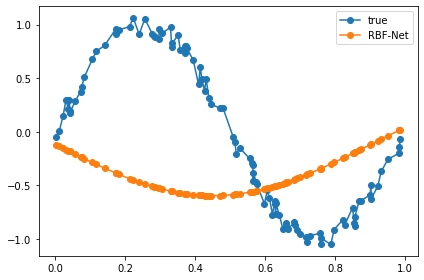

In [20]:
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()